In [1]:
"""
# https://www.quora.com/How-did-Takashi-Kotegawa-turn-13-000-into-around-150-million-in-8-years-of-day-trading

1 - he uses indicators such as Bollinger Bands, 
2 - Relative Strength Index (RSI), 
3 - volume ratio 
4 - 25-day moving average 
5 - buying at least 20% of the stock below the 25-day moving average 
6 - has a 60% win rate.

"""

# Sell
# Price > bup > rsi > 20% sma

# buy
# Price < bdown < rsi < 20% sma

'\n#https://www.quora.com/How-did-Takashi-Kotegawa-turn-13-000-into-around-150-million-in-8-years-of-day-trading\n\n1 - he uses indicators such as Bollinger Bands, \n2 - Relative Strength Index (RSI), \n3 - volume ratio \n4 - 25-day moving average \n5 - buying at least 20% of the stock below the 25-day moving average \n6 - has a 60% win rate.\n'

In [2]:
import numpy as np

import pandas as pd
from pandas import Series, DataFrame
from pandas import *

import matplotlib as plt
import matplotlib.pyplot as plt

import yfinance as yf

print('done')

done


In [22]:
def getPriceBr(listSym, rangePed):
    
    rates_yf = {}
    
    for i in listSym:
        print(i)
        
        rates_yf[i] = yf.download(i+'.SA', period=rangePed)
    
    rates_yf[i] = rates_yf[i].reset_index().rename(columns={'Date':'time', 'Open':'open', 'High':'high', 'Low':'low',
                                                           'Close':'close', 'Volume':'real_volume'})\
                                                            .drop(columns='Adj Close')
    
    return rates_yf
    

In [72]:
sym = ['PETR4']

rates_frameD1 = getPriceBr(sym, '4y')

df = rates_frameD1['PETR4']
df

PETR4
[*********************100%***********************]  1 of 1 completed


In [75]:
df.shape[0]

996

In [76]:
df.tail(1)

,time,open,high,low,close,real_volume
995,2023-02-17,26.67,26.67,26.370001,26.440001,61085700


In [77]:
df['sma'] = df['close'].rolling(window=25).mean()

<AxesSubplot:>

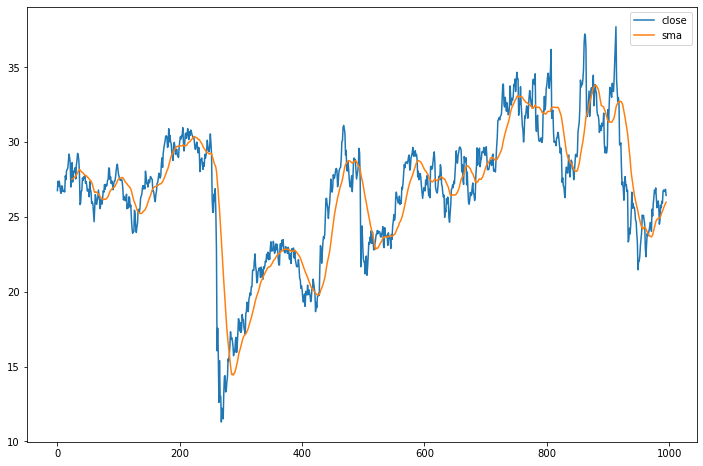

In [78]:
df[['close','sma']].plot(figsize=(12,8))

In [79]:
timeDays = 25

sma = df['close'].rolling(timeDays).mean()
std = df['close'].rolling(timeDays).std()

df['bup'] = sma + std * 2
df['bdown'] = sma - std * 2



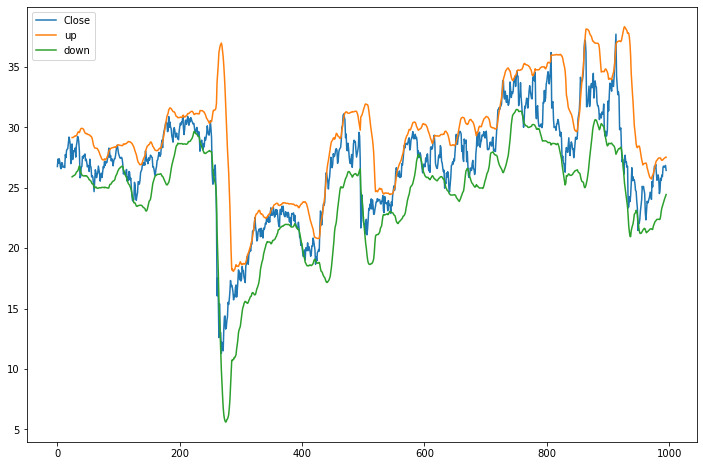

In [80]:
plt.figure(figsize=(12,8))

plt.plot(df['close'], label='Close')
plt.plot(df['bup'], label='up')
plt.plot(df['bdown'], label='down')
plt.legend()
plt.show()

In [81]:

import talib

In [82]:
# RSI 
# Talib - 

import talib

close = df['close']
df['rsi'] = talib.RSI(close, timeperiod=25)

<AxesSubplot:>

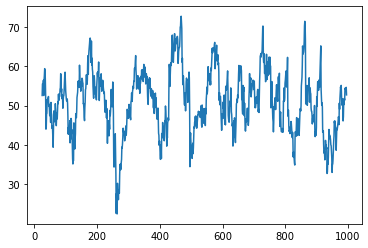

In [83]:
df['rsi'].plot()

In [84]:
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'real_volume', 'sma', 'bup',
       'bdown', 'rsi'],
      dtype='object')

In [85]:
# High

df['distSmaH'] = ((df['high'] - df['sma']) / df['sma']) * 100  

df['distSmaD'] = ((df['low'] - df['sma']) / df['sma']) * 100  

In [86]:
df.tail()

,time,open,high,low,close,real_volume,sma,bup,bdown,rsi,distSmaH,distSmaD
991,2023-02-13,26.690001,26.889999,26.370001,26.799999,36726900,25.6160,27.403316,23.828684,54.473528,4.973451,2.943476
992,2023-02-14,26.850000,27.059999,26.600000,26.700001,35839000,25.7204,27.439940,24.000861,54.041952,5.208314,3.419854
993,2023-02-15,26.580000,26.799999,26.299999,26.740000,72554100,25.8188,27.475285,24.162315,54.193164,3.800328,1.863755
994,2023-02-16,26.600000,26.950001,26.490000,26.850000,44115700,25.9076,27.536334,24.278866,54.620880,4.023532,2.247987
995,2023-02-17,26.670000,26.670000,26.370001,26.440001,61085700,25.9824,27.524642,24.440159,52.709989,2.646406,1.491781


In [87]:
# Sell
# Price > bup > rsi > 20% sma

# buy
# Price < bdown < rsi < 20% sma

In [88]:
buy = []
sell = []

for i in range(len(df['close'])):
    
    # sell signal
    if (df['high'].iloc[i] > df['bup'].iloc[i]) and (df['rsi'].iloc[i] > 60) and \
        (df['distSmaH'].iloc[i] > 15):
        
        buy.append(np.nan)
        sell.append(df['close'].iloc[i])
    
    # Buy 
    elif (df['low'].iloc[i] < df['bdown'].iloc[i]) and (df['rsi'].iloc[i] < 40) and \
         (df['distSmaD'].iloc[i] < 15):
        
        buy.append(df['close'].iloc[i])
        sell.append(np.nan)
        
    else:
        
        buy.append(np.nan)
        sell.append(np.nan)
        
df['buy'] = buy
df['sell'] = sell    

In [89]:
df

,time,open,high,low,close,real_volume,sma,bup,bdown,rsi,distSmaH,distSmaD,buy,sell
0,2019-02-18,26.590000,26.790001,26.410000,26.760000,43379000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-19,26.860001,27.400000,26.840000,27.379999,58041900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-20,27.500000,27.660000,26.870001,27.040001,55114500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-21,27.180000,27.490000,26.820000,27.400000,46559400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-22,27.549999,27.700001,27.129999,27.129999,36602000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2023-02-13,26.690001,26.889999,26.370001,26.799999,36726900,25.6160,27.403316,23.828684,54.473528,4.973451,2.943476,NaN,NaN
992,2023-02-14,26.850000,27.059999,26.600000,26.700001,35839000,25.7204,27.439940,24.000861,54.041952,5.208314,3.419854,NaN,NaN
993,2023-02-15,26.580000,26.799999,26.299999,26.740000,72554100,25.8188,27.475285,24.162315,54.193164,3.800328,1.863755,NaN,NaN
994,2023-02-16,26.600000,26.950001,26.490000,26.850000,44115700,25.9076,27.536334,24.278866,54.620880,4.023532,2.247987,NaN,NaN


In [90]:
def plotSig(df, symBol):
    
    plt.figure(figsize=(20,12))
    
    plt.title('Test' +str(symBol))
    plt.plot(df['time'], df['close'], label='Close')
    
    plt.plot(df['time'], df['bup'], label='B_Upper')
    
    plt.plot(df['time'], df['bdown'], label='B_Down')
    
    plt.scatter(df['time'], df['buy'], label= 'Buy', marker='^', color='green')

    plt.scatter(df['time'], df['sell'], label= 'Sell', marker='v', color='red')
    
    plt.legend()
    
    plt.show()

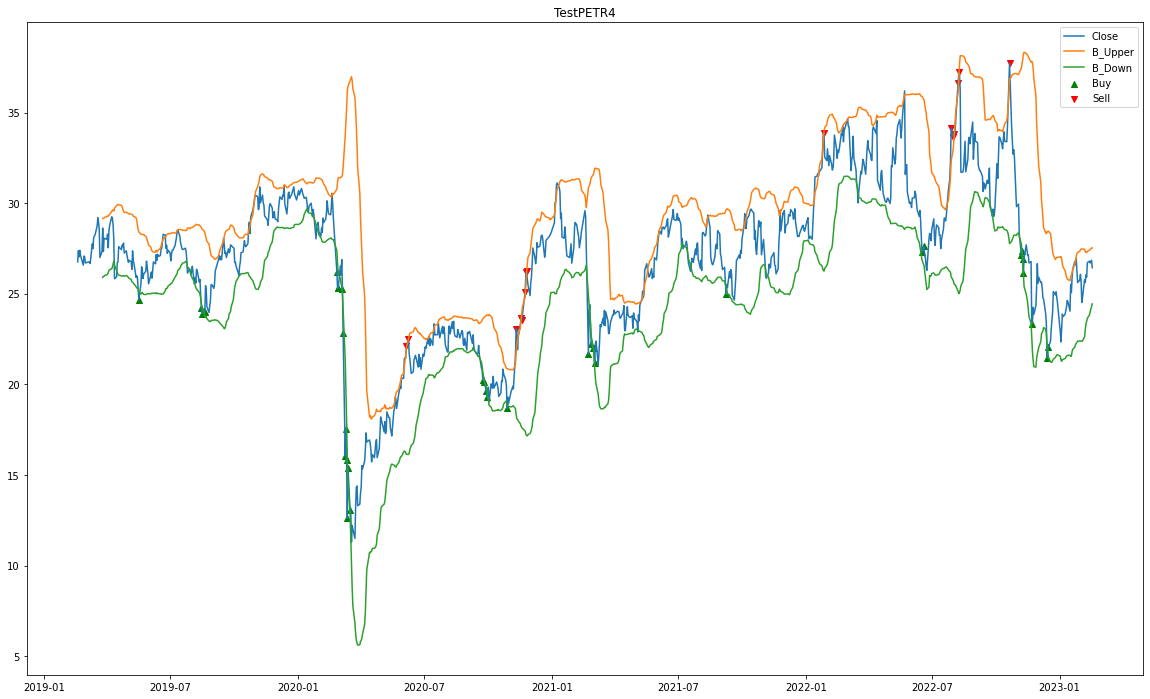

In [92]:
plotSig(df, 'PETR4')

In [109]:
def getSignalMain(dfRef, symBol, timeDays ):
    
    df = dfRef.copy()
    
    timeDays= timeDays  
    
    df['sma'] = df['close'].rolling(window=timeDays).mean()
    
    
    sma = df['close'].rolling(timeDays).mean()
    std = df['close'].rolling(timeDays).std()

    df['bup'] = sma + std * 2
    df['bdown'] = sma - std * 2
    
    close = df['close']
    df['rsi'] = talib.RSI(close, timeperiod=25)
    
    df['distSmaH'] = ((df['high'] - df['sma']) / df['sma']) * 100  

    df['distSmaD'] = ((df['low'] - df['sma']) / df['sma']) * 100  
    
    
    buy = []
    sell = []

    for i in range(len(df['close'])):

        # sell signal
        if (df['high'].iloc[i] > df['bup'].iloc[i]) and (df['rsi'].iloc[i] > 60) and \
            (df['distSmaH'].iloc[i] > 20):

            buy.append(np.nan)
            sell.append(df['close'].iloc[i])

        # Buy 
        elif (df['low'].iloc[i] < df['bdown'].iloc[i]) and (df['rsi'].iloc[i] < 40) and \
             (df['distSmaD'].iloc[i] < 20):

            buy.append(df['close'].iloc[i])
            sell.append(np.nan)

        else:

            buy.append(np.nan)
            sell.append(np.nan)

    df['buy'] = buy
    df['sell'] = sell    
    
    plotSig(df, symBol)
    
    tsell = df.replace(np.nan, 0)[t.replace(np.nan, 0)['sell'] != 0]
    
    tbuy = df.replace(np.nan, 0)[t.replace(np.nan, 0)['buy'] != 0]
    
    return df, tsell,  tbuy 

In [110]:
sym = ['MGLU3']

rates_frameD1 = getPriceBr(sym, '4y')

df = rates_frameD1[sym[0]]
df

MGLU3
[*********************100%***********************]  1 of 1 completed


,time,open,high,low,close,real_volume
0,2019-02-18,5.121250,5.266875,5.078125,5.266875,14982400
1,2019-02-19,5.250000,5.374375,5.237812,5.301875,30272000
2,2019-02-20,5.371250,5.371250,5.070312,5.078125,48358400
3,2019-02-21,5.129062,5.140625,4.986562,5.034375,40636800
4,2019-02-22,5.312812,5.661250,5.185312,5.559375,122038400
...,...,...,...,...,...,...
991,2023-02-13,3.990000,4.200000,3.910000,4.130000,118107700
992,2023-02-14,4.150000,4.220000,4.010000,4.060000,115253900
993,2023-02-15,4.040000,4.080000,3.830000,3.890000,201460500
994,2023-02-16,3.890000,3.940000,3.710000,3.810000,151942100


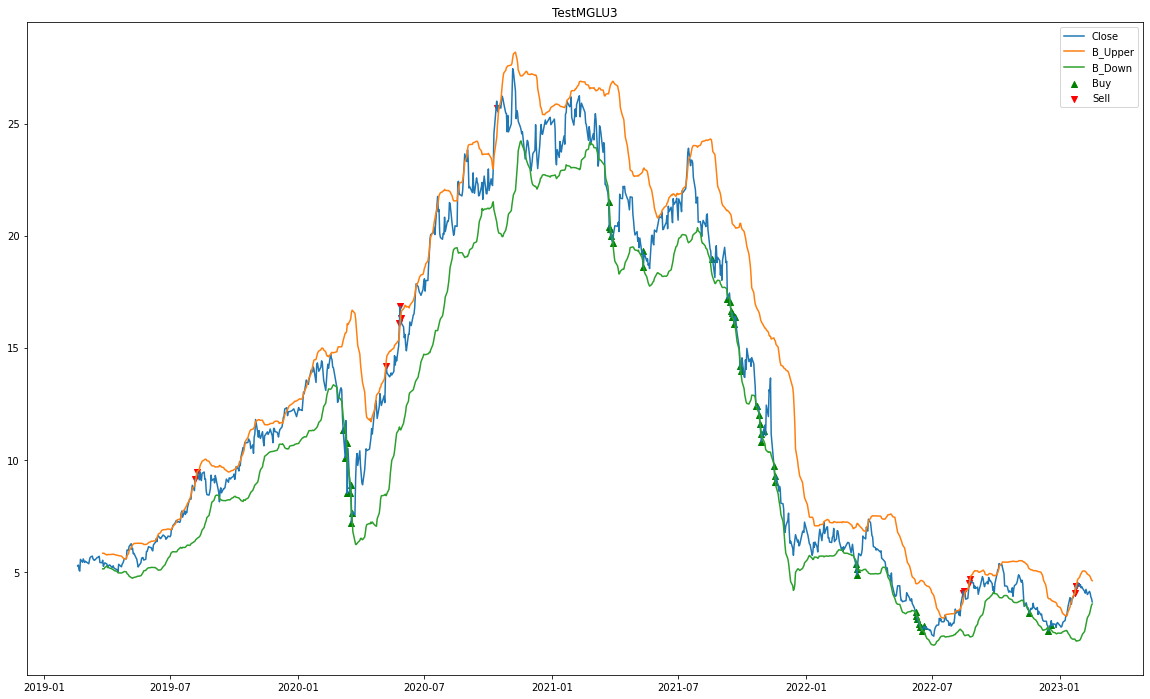

In [111]:
t, tse, tbu = getSignalMain(df, 'MGLU3', 25 )

In [108]:
tse

,time,open,high,low,close,real_volume,sma,bup,bdown,rsi,distSmaH,distSmaD,buy,sell
322,2020-06-05,15.500000,15.522500,14.630000,14.862500,77709600,14.6143,16.817997,12.410603,56.281680,6.214460,0.107429,0.0,0.0
323,2020-06-08,15.002500,15.820000,14.825000,15.595000,82881200,14.7237,16.834098,12.613302,59.202559,7.445815,0.688004,0.0,0.0
430,2020-11-10,26.010000,27.120001,25.180000,25.219999,79060600,25.2292,28.033929,22.424471,54.570166,7.494493,-0.195011,0.0,0.0
435,2020-11-17,24.750000,25.270000,24.530001,24.730000,31907900,25.6748,27.122708,24.226892,52.139228,-1.576642,-4.458844,0.0,0.0
436,2020-11-18,24.700001,24.730000,24.070000,24.540001,31523100,25.6164,27.126112,24.106688,51.307889,-3.460285,-6.036759,0.0,0.0
438,2020-11-23,24.299999,24.370001,23.219999,23.420000,59639700,25.4912,27.272851,23.709550,46.598060,-4.398377,-8.909744,0.0,0.0
439,2020-11-24,23.370001,23.969999,22.900000,23.700001,57465100,25.4072,27.321284,23.493116,47.835239,-5.656667,-9.868071,0.0,0.0
440,2020-11-25,23.670000,24.309999,23.520000,24.000000,38914800,25.3396,27.329923,23.349278,49.150028,-4.063208,-7.180854,0.0,0.0
729,2022-01-27,6.910000,7.280000,6.880000,7.220000,161788200,6.4584,7.246598,5.670202,47.477171,12.721421,6.527935,0.0,0.0
855,2022-07-29,2.740000,2.770000,2.570000,2.580000,167546200,2.6372,3.130742,2.143658,40.915235,5.035643,-2.548160,0.0,0.0


In [107]:
tbu

,time,open,high,low,close,real_volume,sma,bup,bdown,rsi,distSmaH,distSmaD,buy,sell
60,2019-05-17,5.158437,5.400625,5.158437,5.275625,33945600,5.542962,6.277492,4.808433,46.475592,-2.567890,-6.937186,0.0000,0.0
122,2019-08-15,9.375000,9.507500,9.027500,9.077500,40306800,8.310975,9.854001,6.767949,66.329435,14.396926,8.621436,0.0000,0.0
123,2019-08-16,9.397500,9.462500,9.100000,9.390000,35834400,8.396512,9.931906,6.861119,68.683861,12.695596,8.378336,0.0000,0.0
124,2019-08-19,9.517500,9.550000,9.325000,9.457500,23158000,8.486500,9.995078,6.977922,69.168933,12.531672,9.880398,0.0000,0.0
125,2019-08-20,9.412500,9.420000,9.052500,9.132500,41342400,8.559300,10.006215,7.112384,64.182783,10.055731,5.762152,0.0000,0.0
253,2020-02-26,13.265000,13.512500,12.940000,13.220000,53716400,14.030300,14.819614,13.240986,49.370453,-3.690586,-7.771042,0.0000,0.0
254,2020-02-27,13.000000,13.350000,12.505000,12.562500,58818800,13.973700,14.957711,12.989689,44.878166,-4.463383,-10.510459,0.0000,0.0
255,2020-02-28,12.250000,12.630000,11.805000,12.630000,78799200,13.922000,15.043439,12.800561,45.409363,-9.280276,-15.206147,0.0000,0.0
259,2020-03-05,13.000000,13.000000,11.650000,11.947500,84786000,13.743200,15.159032,12.327368,41.659962,-5.407766,-15.230808,0.0000,0.0
260,2020-03-06,11.032500,11.602500,10.762500,11.332500,113371200,13.623600,15.314052,11.933148,38.470975,-14.835286,-21.001059,11.3325,0.0
